# Fitting a Circle to Cluster of 3D Points

Author: **_Michal Dvorak_**, 15-06-2016

This article describes a method how to fit a circle to cluster of points in 3D space.

## 1 Introduction

Assume we have a set of $n$ points $\mathbf{P}_0,\dots,\mathbf{P}_{n-1}$, where $\mathbf{P}_i = (x_i, y_i, z_i)^T \in \mathbb{R}^3$. We want to find a circle that fits as close as possible to the set of points. A circle in 3D space can be represented by a parametric equation

$$ \mathbf{P_{circle}}(t) = r\cos(t)\mathbf{u} + r\sin(t)(\mathbf{n}\times\mathbf{u})  + \mathbf{C}, \; 0 \leq t \leq 2\pi $$

with radius $r$, center $\mathbf{C}$ and normal unit vector $\mathbf{n}$. Vector $\mathbf{u}$ is any unit vector perpendicular to $\mathbf{n}$. If we specify orientation of the circle in space by zenith angle $\phi$ and azimuth $\theta$, we get

$$\mathbf{n} = \left(\begin{matrix}
    \cos(\phi)\sin(\theta) \\
    \sin(\phi)\sin(\theta) \\
    \cos(\theta)
    \end{matrix}\right),
  \quad
  \mathbf{u} = \left(\begin{matrix}
    -\sin(\phi) \\
    \cos(\phi) \\
    0
  \end{matrix}\right).$$




## 2 Algorithm

The circle fitting method can be split into the following steps:

1. Using **_SVD (Singular Value Decomposition)_** find the best fitting plane to the set of mean-centered points.

2. Project the mean-centered points onto the fitting plane in new 2D coords.

3. Using **_method of least squares_** fit a circle in the 2D coords and get circle center and radius.

4. Transform the circle center back to 3D coords. Now the fitting circle is specified by its center, radius and normal vector.


### 2.1 Fitting Plane by SVD

Assume we want to find a plane that fits as close as possible to set of 3D points, and the closeness is measured by the square sum of orthogonal distances between the plane and the points. Lets introduce $n\times 3$ matrix of mean-centered points $\mathbf{A} = \left(\mathbf{P}_0-\mathbf{c}, \dots, \mathbf{P}_{n-1}-\mathbf{c} \right)^T$, where $\mathbf{c} = \frac{1}{n} \sum_{i} \mathbf{P}_i$. Then the problem of finding the normal unit vector $\mathbf{n}$ for the fitting plane can be formulated as
<br>

$$\mathbf{n} = \arg\!\min_{\mathbf{n}\in \mathbb{R}^3 \atop \|\mathbf{n}\|=1}  \| \mathbf{A} \mathbf{n} \|^2 . $$

Lets use singular value decomposition $ \mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, where $\mathbf{U}, \mathbf{V}$ are unitary matrices (orthonormal columns and rows), and $\mathbf{\Sigma}$ is a diagonal matrix containing singular values $\sigma_1 \geq \sigma_2 \geq \sigma_3 \geq 0$. Using the SVD decomposition we can write

$$\| \mathbf{A} \mathbf{n} \|^2 = \| \mathbf{U} \mathbf{\Sigma}  \mathbf{V}^T \mathbf{n} \|^2 =
\| \mathbf{\Sigma}  \mathbf{V}^T \mathbf{n} \|^2 =
(\sigma_1 b_1)^2 +(\sigma_2 b_2)^2+(\sigma_3 b_3)^2 ,  $$

where we introduced substitution $\mathbf{b} = \mathbf{V}^T \mathbf{n}$. Thus, our expression is obviously minimized by choosing $\mathbf{b} = (0,0,1)^T$ since $\sigma_3$ is the lowest singular value. We can finally find $\mathbf{n}$ by solving $\mathbf{V}^T \mathbf{n} = \mathbf{b} $, which is trivial since $\mathbf{V}$ is an unitary matrix, so $\mathbf{V}\mathbf{V}^T = \mathbf{I}$.

$$\begin{eqnarray}
\mathbf{V}^T \mathbf{n} &=& \mathbf{b} \\
\mathbf{V} \mathbf{V}^T \mathbf{n} &=& \mathbf{V}\mathbf{b} \\
\mathbf{n} &=& \mathbf{V}\mathbf{b} = \mathbf{V} \left( \begin{smallmatrix} 0\\0\\1 \end{smallmatrix} \right) = \mathbf{V}(:,3)
\end{eqnarray}$$

Now we can see the expression $\| \mathbf{A} \mathbf{n} \|^2 $ is minimized if and only if the normal vector $\mathbf{n}$ is choose as the $3^{rd}$ column of matrix $\mathbf{V}$.


### 2.2 Projecting Points onto the Fitting Plane

We can utilize the Rodrigues rotation formula to project 3D points onto the fitting plane and get their 2D X-Y coords in the coord system of plane. Note that we need to choose axis of rotation $\mathbf{k}$ as cross product between plane normal and normal of the new X-Y coords. Thus, $\mathbf{k} = \mathbf{n} \times (0,0,1)^T$.

\begin{eqnarray}
 \mathbf{P_{rot}} = \mathbf{P}\cos(\theta) + (\mathbf{k}\times\mathbf{P})\sin(\theta) + \mathbf{k}\langle\mathbf{k}, \mathbf{P}\rangle(1-\cos(\theta))
\end{eqnarray}

### 2.3 Circle Fitting in Projected 2D Coords

Assume we want to fit a circle to set of $n$ points. The implicit equation in 2D for a circle with radius $r$ and center $(x_c,y_c)$ can be arranged as

$$\begin{eqnarray}
(x-x_c)^2 + (y-y_c)^2 &=& r^2 \\
(2 x_c) x + (2 y_c) y + (r^2-x_c^2-y_c^2) &=& x^2+y^2 \\
c_0 x + c_1 y + c_2 &=& x^2+y^2
\end{eqnarray}$$

where we introduced vector $\mathbf{c}$ of unknown paramters. When we apply the last equations for all 2D points we get a system of liner equations formulated as

$$ \mathbf{A}\mathbf{c} = \mathbf{b} $$

where we fill A and b with input data 
$$ \mathbf{A} = 
\begin{pmatrix}
  x_0 & y_0 & 1 \\
  \vdots  & \vdots  & \vdots  \\
  x_{n-1} & y_{n-1} & 1 
\end{pmatrix},
\quad
\mathbf{b} = 
\begin{pmatrix}
  x_0^2 + y_0^2 \\
  \vdots  \\
  x_{n-1}^2 + y_{n-1}^2 
\end{pmatrix}$$

Since we have more equations than unknows we need to find an approximate solution by **_method of least squares_**. This method minimize the square sum of residuals $\|\mathbf{A}\mathbf{c}-\mathbf{b}\|^2$, thus

$$ \mathbf{c} = \arg\!\min_{\mathbf{c}\in \mathbb{R}^3} \|\mathbf{A}\mathbf{c}-\mathbf{b}\|^2 $$

The method of least squares is already implemented in package NumPy by function `linalg.lstsq` that we can call with input data $\mathbf{A}, \mathbf{b}$. If weighting of our points were desired, we can modify input data by diagonal matrix of weights $\mathbf{W} = \mathrm{diag}(w_0,\dots,w_{n-1})$ as follows

$$ \tilde{\mathbf{A}} = \mathbf{W}\mathbf{A}, \quad \tilde{\mathbf{b}} = \mathbf{W}\mathbf{b} $$




## Generate 3D Points  

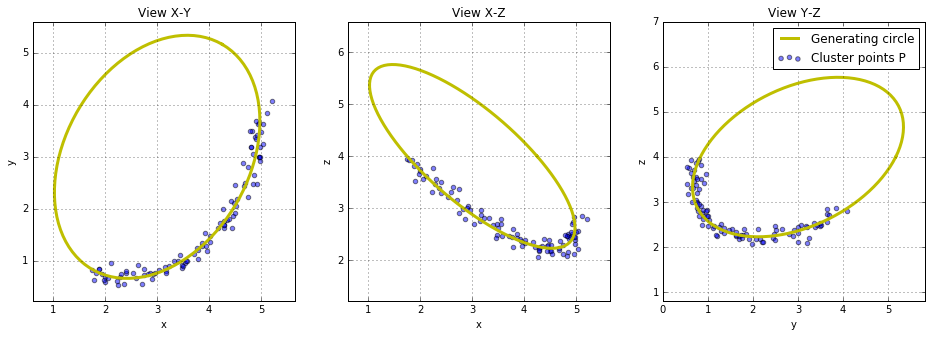

In [53]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d.axes3d import Axes3D

#-------------------------------------------------------------------------------
# Generate points on circle
# P(t) = r*cos(t)*u + r*sin(t)*(n x u) + C
#-------------------------------------------------------------------------------
def generate_circle_by_vectors(t, C, r, n, u):
    n = n/linalg.norm(n)
    u = u/linalg.norm(u)
    P_circle = r*cos(t)[:,newaxis]*u + r*sin(t)[:,newaxis]*cross(n,u) + C
    return P_circle

def generate_circle_by_angles(t, C, r, theta, phi):
    # Orthonormal vectors n, u, <n,u>=0
    n = array([cos(phi)*sin(theta), sin(phi)*sin(theta), cos(theta)])
    u = array([-sin(phi), cos(phi), 0])
    
    # P(t) = r*cos(t)*u + r*sin(t)*(n x u) + C
    P_circle = r*cos(t)[:,newaxis]*u + r*sin(t)[:,newaxis]*cross(n,u) + C
    return P_circle

#-------------------------------------------------------------------------------
# Generating circle
#-------------------------------------------------------------------------------
r = 2.5               # Radius
C = array([3,3,4])    # Center
theta = 45/180*pi     # Azimuth
phi   = -30/180*pi    # Zenith

t = linspace(0, 2*pi, 100)
P_gen = generate_circle_by_angles(t, C, r, theta, phi)

#-------------------------------------------------------------------------------
# Cluster of points
#-------------------------------------------------------------------------------
t = linspace(-pi, -0.25*pi, 100)
n = len(t)
P = generate_circle_by_angles(t, C, r, theta, phi)

# Add some random noise to the points
P += random.normal(size=P.shape) * 0.1

#-------------------------------------------------------------------------------
# Plot
#-------------------------------------------------------------------------------
f, ax = subplots(1, 3, figsize=(16,5))
alpha_pts = 0.5
i = 0
ax[i].plot(P_gen[:,0], P_gen[:,1], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:,0], P[:,1], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View X-Y')
ax[i].set_xlabel('x'); ax[i].set_ylabel('y');
ax[i].set_aspect('equal', 'datalim'); ax[i].margins(.1, .1); ax[i].grid()
i = 1
ax[i].plot(P_gen[:,0], P_gen[:,2], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:,0], P[:,2], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View X-Z')
ax[i].set_xlabel('x'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim'); ax[i].margins(.1, .1); ax[i].grid()
i = 2
ax[i].plot(P_gen[:,1], P_gen[:,2], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:,1], P[:,2], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View Y-Z')
ax[i].set_xlabel('y'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim'); ax[i].margins(.1, .1); ax[i].grid()
ax[i].legend()

## Auxiliary Functions

In [54]:
#-------------------------------------------------------------------------------
# FIT CIRCLE 2D
# - Find center [xc, yc] and radius r of circle fitting to set of 2D points
# - Optionally specify weights for points
#
# - Implicit circle function:
#   (x-xc)^2 + (y-yc)^2 = r^2
#   (2*xc)*x + (2*yc)*y + (r^2-xc^2-yc^2) = x^2+y^2
#   c[0]*x + c[1]*y + c[2] = x^2+y^2
#
# - Solution by method of least squares:
#   A*c = b, c' = argmin(||A*c - b||^2)
#   A = [x y 1], b = [x^2+y^2]
#-------------------------------------------------------------------------------
def fit_circle_2d(x, y, w=[]):
    
    A = array([x, y, ones(len(x))]).T
    b = x**2 + y**2
    
    # Modify A,b for weighted least squares
    if len(w) == len(x):
        W = diag(w)
        A = dot(W,A)
        b = dot(b,W)
    
    # Solve by method of least squares
    c = linalg.lstsq(A,b)[0]
    
    # Get circle parameters from solution c
    xc = c[0]/2
    yc = c[1]/2
    r = sqrt(c[2] + xc**2 + yc**2)
    return xc, yc, r


#-------------------------------------------------------------------------------
# RODRIGUES ROTATION
# - Rotate given points based on a starting and ending vector
# - Axis k and angle of rotation theta given by vectors n0,n1
#   P_rot = P*cos(theta) + (k x P)*sin(theta) + k*<k,P>*(1-cos(theta))
#-------------------------------------------------------------------------------
def rodrigues_rot(P, n0, n1):
    
    # If P is only array (coords of single point), fix it to be matrix
    if P.ndim == 1:
        P = P[newaxis,:]
    
    # Get vector of rotation k and angle theta
    n0 = n0/linalg.norm(n0)
    n1 = n1/linalg.norm(n1)
    k = cross(n0,n1)
    k = k/linalg.norm(k)
    theta = arccos(dot(n0,n1))
    
    # Compute rotated points
    P_rot = zeros((len(P),3))
    for i in range(len(P)):
        P_rot[i] = P[i]*cos(theta) + cross(k,P[i])*sin(theta) + k*dot(k,P[i])*(1-cos(theta))

    return P_rot


#-------------------------------------------------------------------------------
# ANGLE BETWEEN
# - Get angle between vectors u,v with sign based on plane with unit normal n
#-------------------------------------------------------------------------------
def angle_between(u, v, n=None):
    if n is None:
        return arctan2(linalg.norm(cross(u,v)), dot(u,v))
    else:
        return arctan2(dot(n,cross(u,v)), dot(u,v))

    
#-------------------------------------------------------------------------------
# - Make axes of 3D plot to have equal scale
# - This is a workaround to Matplotlib's set_aspect('equal') and axis('equal')
#   which were not working for 3D
#-------------------------------------------------------------------------------
def set_axes_equal_3d(ax):
    limits = array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()])
    spans = abs(limits[:,0] - limits[:,1])
    centers = mean(limits, axis=1)
    radius = 0.5 * max(spans)
    ax.set_xlim3d([centers[0]-radius, centers[0]+radius])
    ax.set_ylim3d([centers[1]-radius, centers[1]+radius])
    ax.set_zlim3d([centers[2]-radius, centers[2]+radius])

### Algorithm

Fitting plane: n = [-0.6136  0.3492 -0.7082]
Fitting circle: center = [ 3.0373  2.9603  3.9522], r = 2.443
Fitting arc: u = [ -1.2974e+00  -2.1465e+00  -1.1883e-03], θ = -137


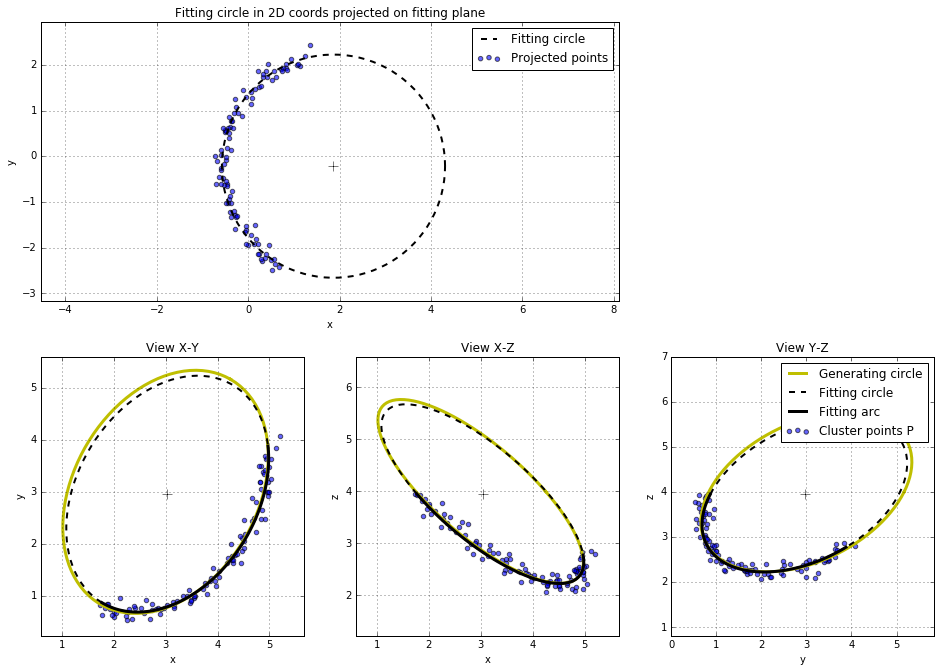

In [55]:
%matplotlib inline
#-------------------------------------------------------------------------------
# Init figures
#-------------------------------------------------------------------------------
fig = figure(figsize=(16,11))
alpha_pts = 0.6
figshape = (2,3)
ax = [None]*4
ax[0] = subplot2grid(figshape, loc=(0,0), colspan=2)
ax[1] = subplot2grid(figshape, loc=(1,0))
ax[2] = subplot2grid(figshape, loc=(1,1))
ax[3] = subplot2grid(figshape, loc=(1,2))
i = 1
ax[i].plot(P_gen[:,0], P_gen[:,1], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:,0], P[:,1], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View X-Y')
ax[i].set_xlabel('x'); ax[i].set_ylabel('y');
ax[i].set_aspect('equal', 'datalim'); ax[i].margins(.1, .1); ax[i].grid()
i = 2
ax[i].plot(P_gen[:,0], P_gen[:,2], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:,0], P[:,2], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View X-Z')
ax[i].set_xlabel('x'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim'); ax[i].margins(.1, .1); ax[i].grid()
i = 3
ax[i].plot(P_gen[:,1], P_gen[:,2], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:,1], P[:,2], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View Y-Z')
ax[i].set_xlabel('y'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim'); ax[i].margins(.1, .1); ax[i].grid()
i = 0
ax[i].set_title('Fitting circle in 2D coords projected on fitting plane')
ax[i].set_xlabel('x'); ax[i].set_ylabel('y');
ax[i].set_aspect('equal', 'datalim'); ax[i].margins(.1, .1); ax[i].grid()

#-------------------------------------------------------------------------------
# Fitting plane by SVD for the mean-centered data
# Eq. of plane is <p,n> + d = 0, where p is a point on plane and n is normal vector
#-------------------------------------------------------------------------------
P_mean = P.mean(axis=0)
P_centered = P - P_mean
U,s,V = linalg.svd(P_centered)

# Normal vector of fitting plane is given by 3rd singular vector in V
normal = V[2,:]
d = -dot(P_mean, normal)  # d = -<p,n>

#--- Project points to coords in 2D plane
P_xy = rodrigues_rot(P_centered, normal, [0,0,1])

ax[0].scatter(P_xy[:,0], P_xy[:,1], alpha=alpha_pts, label='Projected points')

#-------------------------------------------------------------------------------
# Fit circle in new 2D coords
#-------------------------------------------------------------------------------
xc, yc, r = fit_circle_2d(P_xy[:,0], P_xy[:,1])

#--- Generate circle points in 2D
t = linspace(0, 2*pi, 100)
xx = xc + r*cos(t)
yy = yc + r*sin(t)

ax[0].plot(xx, yy, 'k--', lw=2, label='Fitting circle')
ax[0].plot(xc, yc, 'k+', ms=10)
ax[0].legend()

#-------------------------------------------------------------------------------
# Transform circle center back to 3D coords
#-------------------------------------------------------------------------------
C = rodrigues_rot(array([xc,yc,0]), [0,0,1], normal) + P_mean
C = C.flatten()

#--- Generate points for fitting circle
t = linspace(0, 2*pi, 100)
u = P[0] - C
P_fitcircle = generate_circle_by_vectors(t, C, r, normal, u)

ax[1].plot(P_fitcircle[:,0], P_fitcircle[:,1], 'k--', lw=2, label='Fitting circle')
ax[2].plot(P_fitcircle[:,0], P_fitcircle[:,2], 'k--', lw=2, label='Fitting circle')
ax[3].plot(P_fitcircle[:,1], P_fitcircle[:,2], 'k--', lw=2, label='Fitting circle')
ax[3].legend()

#--- Generate points for fitting arc
u = P[0] - C
v = P[-1] - C
theta = angle_between(u, v, normal)

t = linspace(0, theta, 100)
P_fitarc = generate_circle_by_vectors(t, C, r, normal, u)

ax[1].plot(P_fitarc[:,0], P_fitarc[:,1], 'k-', lw=3, label='Fitting arc')
ax[2].plot(P_fitarc[:,0], P_fitarc[:,2], 'k-', lw=3, label='Fitting arc')
ax[3].plot(P_fitarc[:,1], P_fitarc[:,2], 'k-', lw=3, label='Fitting arc')
ax[1].plot(C[0], C[1], 'k+', ms=10)
ax[2].plot(C[0], C[2], 'k+', ms=10)
ax[3].plot(C[1], C[2], 'k+', ms=10)
ax[3].legend()

print('Fitting plane: n = %s' % array_str(normal, precision=4))
print('Fitting circle: center = %s, r = %.4g' % (array_str(C, precision=4), r))
print('Fitting arc: u = %s, θ = %.4g' % (array_str(u, precision=4), theta*180/pi))

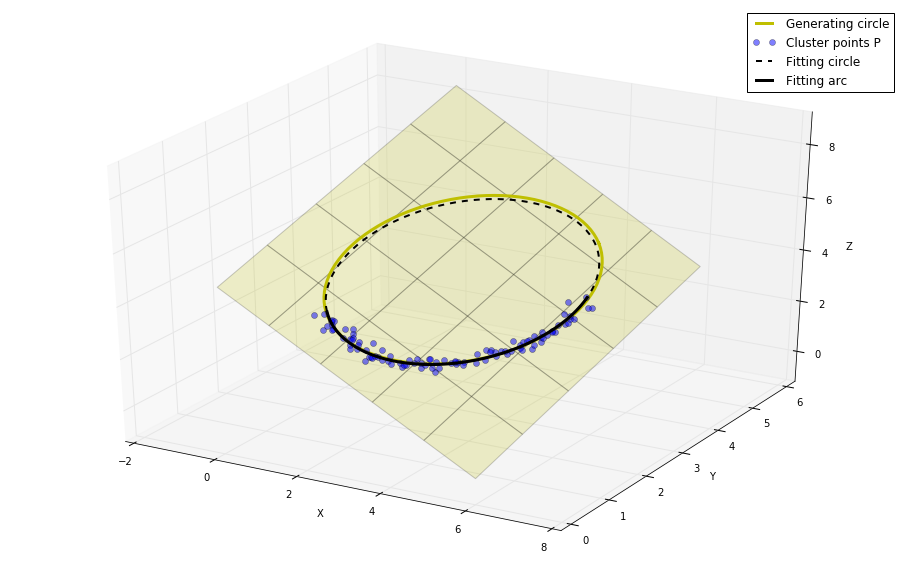

In [48]:
%matplotlib inline

fig = figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot(*P_gen.T, color='y', lw=3, label='Generating circle')
ax.plot(*P.T, ls='', marker='o', alpha=0.5, label='Cluster points P')

#--- Plot fitting plane
xx, yy = meshgrid(linspace(0,6,11), linspace(0,6,11))
zz = (-normal[0]*xx - normal[1]*yy - d) / normal[2]
ax.plot_surface(xx, yy, zz, rstride=2, cstride=2, color='y' ,alpha=0.2, shade=False)

#--- Plot fitting circle
ax.plot(*P_fitcircle.T, color='k', ls='--', lw=2, label='Fitting circle')
ax.plot(*P_fitarc.T, color='k', ls='-', lw=3, label='Fitting arc')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

ax.set_aspect('equal', 'datalim')
set_axes_equal_3d(ax)